In [187]:
import numpy as np
import healpy as hp
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
X = np.load("../data/samples/x_train_ModelO_gamma_fix_336.npy")
y = np.load("../data/samples/theta_train_ModelO_gamma_fix_336.npy")

In [189]:
pca = PCA(n_components=96)

In [190]:
pca_fit = pca.fit(X[:,0,:])

In [191]:
X_pca = pca_fit.transform(X[:,0,:])

In [192]:
# pca.explained_variance_ratio_

In [193]:
X_pca[0]

array([ 1.1252532e+02, -2.6518450e+00,  4.4894695e+01, -4.2819395e+00,
       -1.0687959e+01, -1.9303728e+01,  1.5215264e+01,  1.4187441e+01,
        1.0145568e+01,  1.5354810e+01,  1.4003423e+01, -6.0758018e+00,
        2.4398960e+01, -1.1939001e+00,  9.2066221e+00,  2.6256163e+01,
       -1.2465423e+01, -6.5357943e+00, -1.3632696e+01, -3.2597191e+00,
        1.8390356e+00, -8.3348770e+00, -3.5041830e-01, -1.7826509e+01,
        2.7421009e+01, -3.2218307e+01,  2.8413415e-01,  2.1458447e+00,
        2.3878122e+01, -5.6029329e+00,  1.8759062e+00,  1.5538021e+00,
        5.2718906e+00,  8.0814018e+00, -1.5126908e+01, -1.1289374e+01,
        1.7601488e+01, -9.7173719e+00,  2.3493292e+01,  8.3478708e+00,
       -1.4014924e+01,  8.5086465e-01, -1.5169765e+00,  5.1824993e+01,
        4.4200647e-01, -1.1505685e+01,  4.9922981e+00, -3.0465481e+00,
       -2.5711908e+01,  2.4519539e+00, -8.9150591e+00,  3.4014928e+00,
        2.0155195e+01, -1.1004141e-01,  3.9515118e+01,  9.6636162e+00,
      

(array([  3.,  19.,  92., 564., 291.,  20.,   8.,   2.,   0.,   1.]),
 array([-99.80465  , -73.135826 , -46.467007 , -19.798187 ,   6.8706346,
         33.539455 ,  60.208275 ,  86.8771   , 113.54592  , 140.21474  ,
        166.88356  ], dtype=float32),
 <a list of 10 Patch objects>)

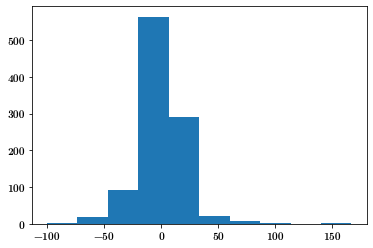

In [73]:
plt.hist(X_pca[:, 10])

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

X_train, X_test = X_pca[:800], X_pca[800:]
y_train, y_test = y[:800], y[800:]
est = KernelRidge().fit(X_train, y_train)


/Users/smsharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [81]:
y_preds = est.predict(X_test)

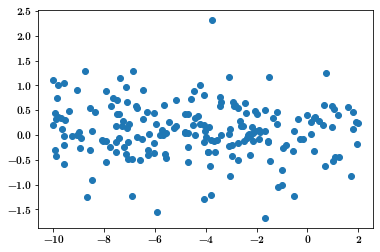

In [91]:
param = 15
plt.scatter(y_test[:, param], y_preds[:, param])